In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
workouts = pd.read_csv('workouts.csv', parse_dates=['start_at']) 

users = pd.read_excel('users.xlsx') # подключимся к данным по клиентам

Создадим новый датафрейм, в котором соединены уроки и пользователи

In [ ]:
workouts_users =  pd.merge(workouts, 
                           users, 
                           how='left',                      
                           left_on='client_id', 
                           right_on='user_id')

In [4]:
payments = pd.read_excel('payments.xlsx') # подключимся к данным по оплатам

marketing = pd.read_excel('marketing.xlsx') # подключимся к данным маркетинга

### Задача

Мы хотим исследовать динамику общего количества тренировок в течение года по неделям.

__Подготовим данные__

Нужно сгруппировать данные по неделям и посчитать количество тренировок в каждой неделе. 

Для этого используем функцию `resample()` — она сделает по столбцу с датой группировку любой гранулярности (год, месяц, неделя и т.д.) без `groupby()`.

Мы сгруппируем данные по 1 неделе и посчитаем количество тренировок функцией `count()`.

In [5]:
# записываем новый датасет с количеством тренировок по неделям
workouts_byweek = workouts.resample('W', on='start_at')['workout_id'].count() 

#выведем первые 10 элементов
workouts_byweek.head(10)

start_at
2020-01-05      24
2020-01-12     122
2020-01-19     270
2020-01-26     427
2020-02-02     571
2020-02-09     795
2020-02-16     959
2020-02-23    1075
2020-03-01    1241
2020-03-08    1339
Freq: W-SUN, Name: workout_id, dtype: int64

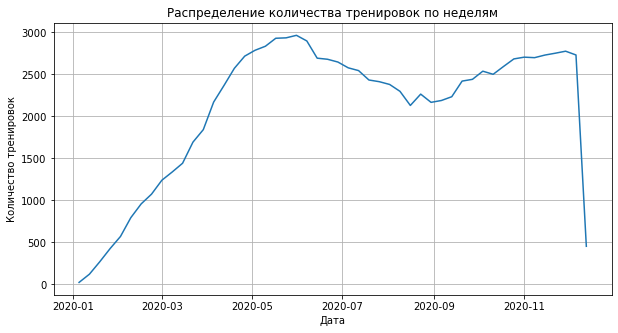

In [6]:
plt.figure(figsize=(10, 5)) # размерность
plt.title('Распределение количества тренировок по неделям') 
plt.xlabel('Дата') 
plt.ylabel('Количество тренировок') 
plt.grid() # сетка

#передаем в функцию 1 аргумент, поэтому по оси X - будет индекс - это дата

plt.plot(workouts_byweek) #количество тренировок в каждую неделю 
plt.show()

Мы видим, что в последнем месяце количество тренировок меньше. Скорее всего, это происходит потому, что месяц еще не закончился.

In [7]:
workouts_byweek.tail()

start_at
2020-11-15    2731
2020-11-22    2753
2020-11-29    2777
2020-12-06    2732
2020-12-13     454
Freq: W-SUN, Name: workout_id, dtype: int64

In [8]:
workouts_byweek.iloc[:-1].tail() # берем все элементы, кроме последнего

start_at
2020-11-08    2700
2020-11-15    2731
2020-11-22    2753
2020-11-29    2777
2020-12-06    2732
Freq: W-SUN, Name: workout_id, dtype: int64

Можем задать толщину линии, передав функции `plot()` аргумент `linewidth` и присвоив ему значение.

По умолчанию толщина равна 1.

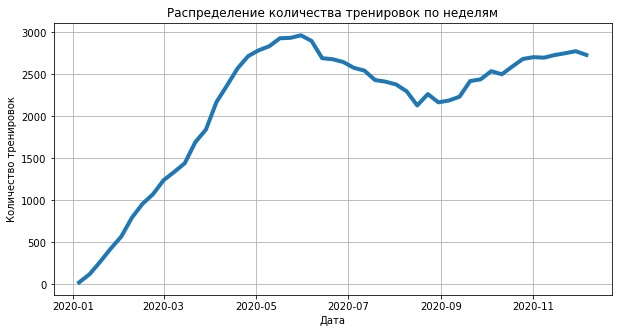

In [34]:
plt.figure(figsize=(10, 5))  
plt.title('Распределение количества тренировок по неделям') 
plt.xlabel('Дата') 
plt.ylabel('Количество тренировок') 
plt.grid() 
 
plt.plot(workouts_byweek.iloc[:-1],linewidth=4) #linewidth - это толщина линии 
plt.show()

График показывает динамику количества тренировок. Замечаем, что в летний сезон есть определенный спад тренировок. Чтобы это было лучше видно, выделим сезоны разными цветами. 

### Разные цвета на линейный график

Так как мы хотим, чтобы цвет точек отличался от сезона к сезону, напишем функцию, которая поможет нам маркировать сезоны. Она будет принимать на вход дату и возвращать название сезона.

In [9]:
def get_season(date):
    month = date.month # вытащим номер месяца из даты 
   
    if month in (3,4,5): 
        return 'Весна'
    elif month in (6,7,8):
        return 'Лето'
    elif month in (9,10,11):
        return 'Осень'
    else:         # остальные месяцы - месяцы зимы
        return 'Зима'

Создадим новый датафрейм и сбросим индекс с помощью `reset_index()`, чтобы дата стала отдельной колонкой

In [10]:
workouts_byweek_seasons = workouts_byweek.reset_index().iloc[:-1] # берем строки кроме последней

Применим функцию к дате и запишем в новую колонку `season`

In [11]:
workouts_byweek_seasons['season'] = workouts_byweek_seasons['start_at'].apply(get_season)


In [13]:
workouts_byweek_seasons.head()

,start_at,workout_id,season
0,2020-01-05,24,Зима
1,2020-01-12,122,Зима
2,2020-01-19,270,Зима
3,2020-01-26,427,Зима
4,2020-02-02,571,Зима


In [14]:
colors_seasons = {'Зима':'b',
                  'Осень':'r', 
                  'Лето':'g', 
                  'Весна':'y'} # зададим цвет для каждого сезона

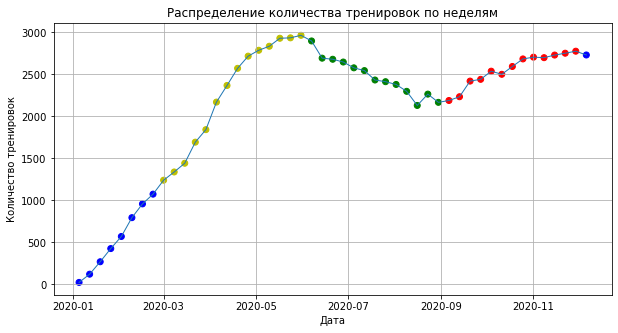

In [15]:
plt.figure(figsize=(10, 5))  
plt.title('Распределение количества тренировок по неделям') 
plt.xlabel('Дата') 
plt.ylabel('Количество тренировок') 
plt.grid() 

#передаем в функцию 2 аргумента, по оси X о дата, а по оси Y - количество тренировок 
plt.plot(workouts_byweek_seasons['start_at'],
         workouts_byweek_seasons['workout_id'],
         linewidth=1) #linewidth - это толщина линии 

#Используем заданные цвета для отрисовки точек на графике
plt.scatter(
    workouts_byweek_seasons.start_at, # ось OX 
    workouts_byweek_seasons.workout_id, # ось OY
    c = workouts_byweek_seasons['season'].map(colors_seasons) # задаем цвета точек
)


plt.show()

Видно, что летом наблюдается спад количества тренировок. И при этом число тренировок растет на протяжении остальных трех сезонов.